In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("...\\superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [79]:
df.shape

(9800, 18)

In [80]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [82]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [83]:
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ','_')
    .str.replace('-','_')
)
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')

In [84]:
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
dtype: int64

In [85]:
df[df['postal_code'].isnull()]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [86]:
df['postal_code'] = df['postal_code'].fillna(5401) # Postal code for Burlington city

In [87]:
print(df.isnull().sum())

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
dtype: int64


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)
df['ship_date']=pd.to_datetime(df['ship_date'],dayfirst=True)

In [90]:
df['year']=df['order_date'].dt.year
df['month']=df['order_date'].dt.month

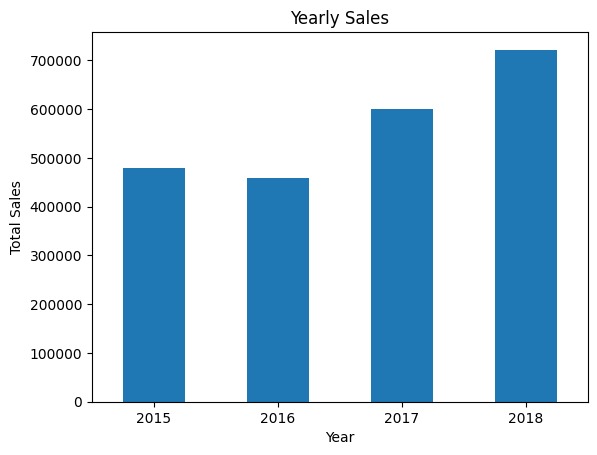

In [91]:
df_sorted = df.sort_values(by='order_date', ascending=False)

df_sorted.groupby('year')['sales'].sum().plot(kind="bar")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.ylabel("Total Sales")
plt.title("Yearly Sales")
plt.show()

In [92]:
monthly_sales = (
    df.groupby(['year', 'month'])['sales']
    .sum()
    .reset_index()
)

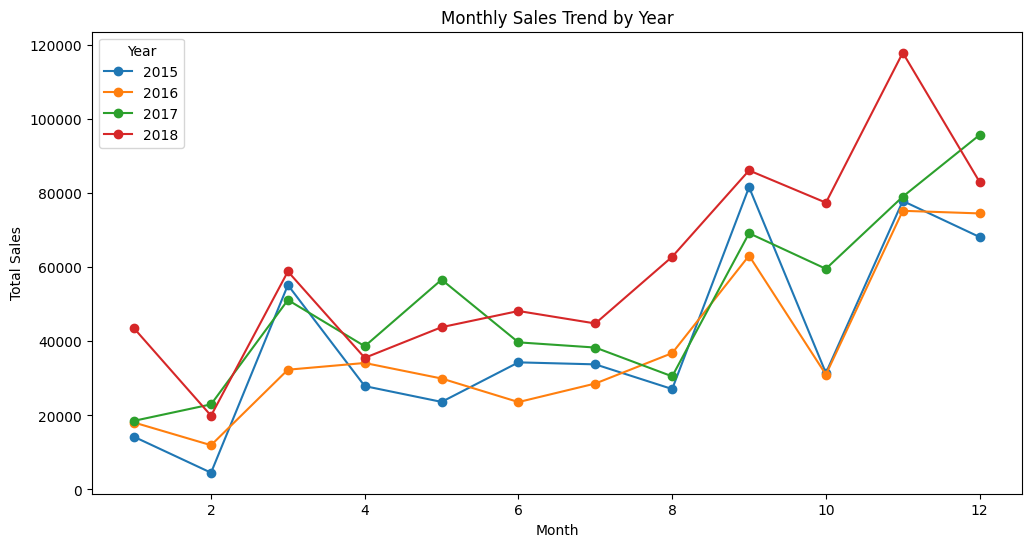

In [93]:
import matplotlib.pyplot as plt

# Get unique years
years = monthly_sales['year'].unique()

plt.figure(figsize=(12,6))

# Loop through each year and plot its data
for year in years:
    data = monthly_sales[monthly_sales['year'] == year]
    plt.plot(data['month'], data['sales'], marker='o', label=year)

plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title='Year')
plt.show()


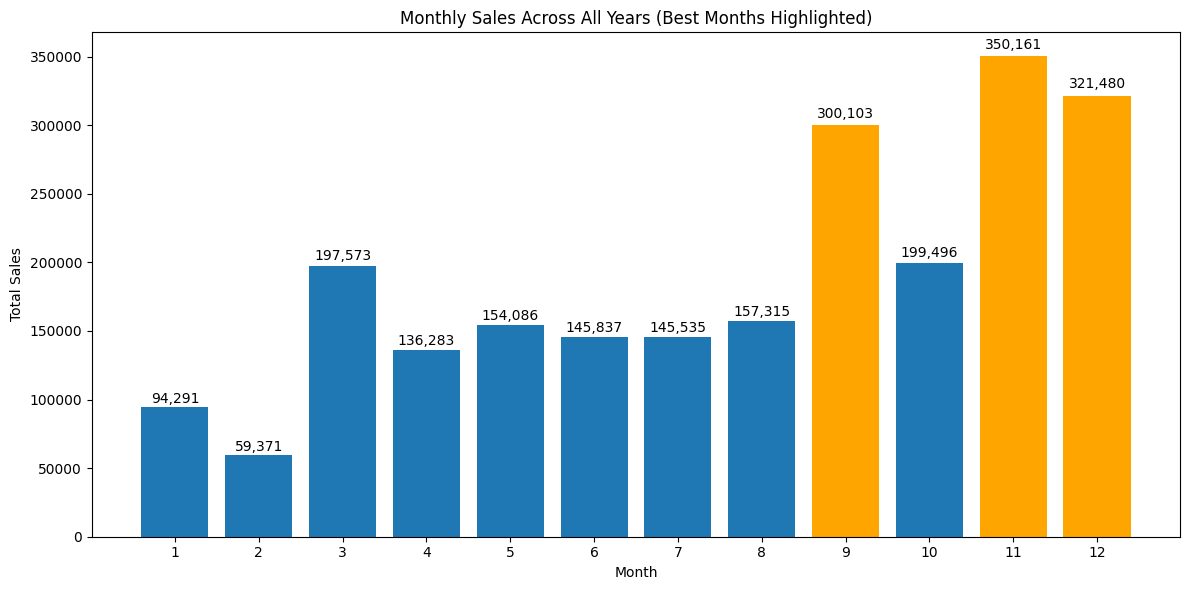

In [94]:
# Aggregate sales by month
monthly_sales = df.groupby('month')['sales'].sum()

# Find the top 3 months
top3_months = monthly_sales.nlargest(3).index

# Highlight top 3 months
default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
colors = ['orange' if m in top3_months else default_color for m in monthly_sales.index]

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(monthly_sales.index, monthly_sales.values, color=colors)

# Value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() * 1.01,
             f'{int(bar.get_height()):,}',
             ha='center', va='bottom')

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Across All Years (Best Months Highlighted)")
plt.xticks(monthly_sales.index)
plt.tight_layout()
plt.show()

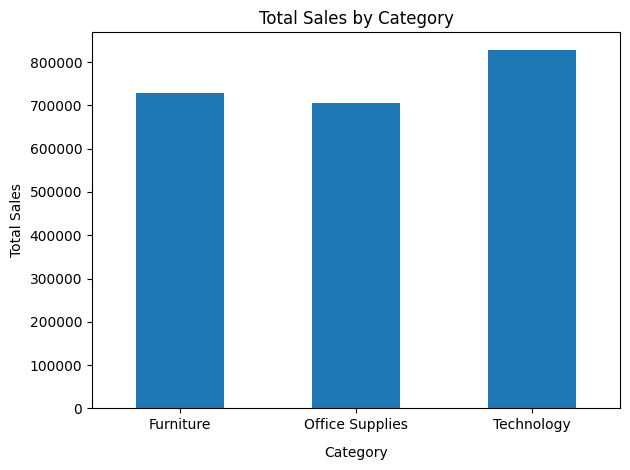

In [95]:
df.groupby('category')['sales'].sum().plot(kind='bar')
plt.xlabel("Category", labelpad=10)
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

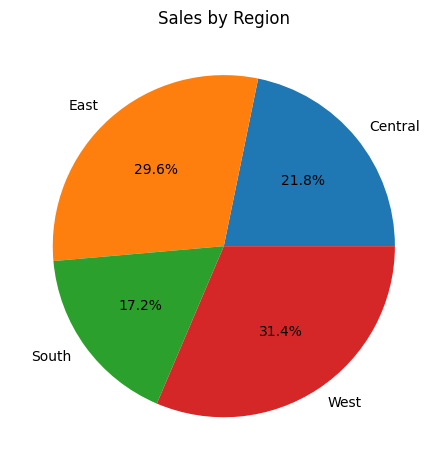

In [96]:
df.groupby('region')['sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales by Region")
plt.ylabel("")
plt.tight_layout()
plt.show()

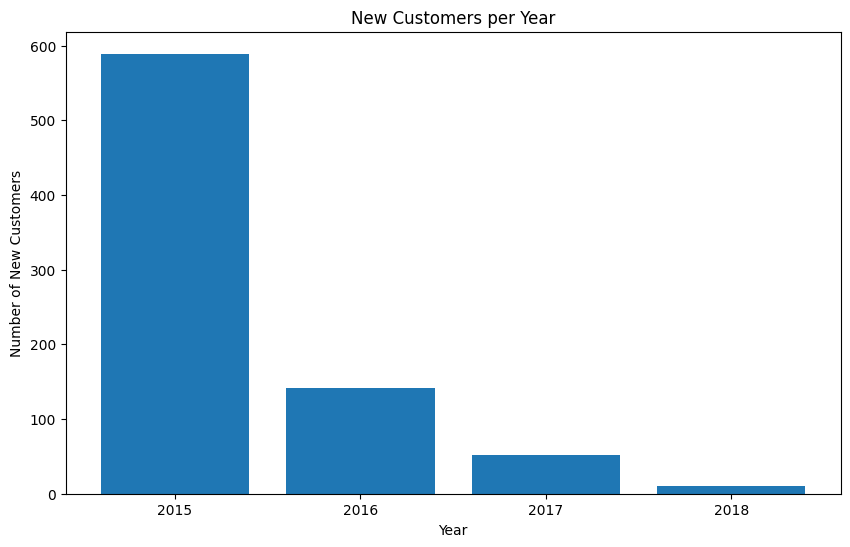

In [97]:
# Get the first purchase date for each customer
first_purchase = df.groupby('customer_id')['order_date'].min().reset_index()
first_purchase['year'] = first_purchase['order_date'].dt.year

# Count new customers per year
new_customers_per_year = first_purchase.groupby('year').size().reset_index(name='new_customers')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(new_customers_per_year['year'], new_customers_per_year['new_customers'])
plt.xlabel('Year')
plt.ylabel('Number of New Customers')
plt.title('New Customers per Year')
plt.xticks(new_customers_per_year['year'])  
plt.show()

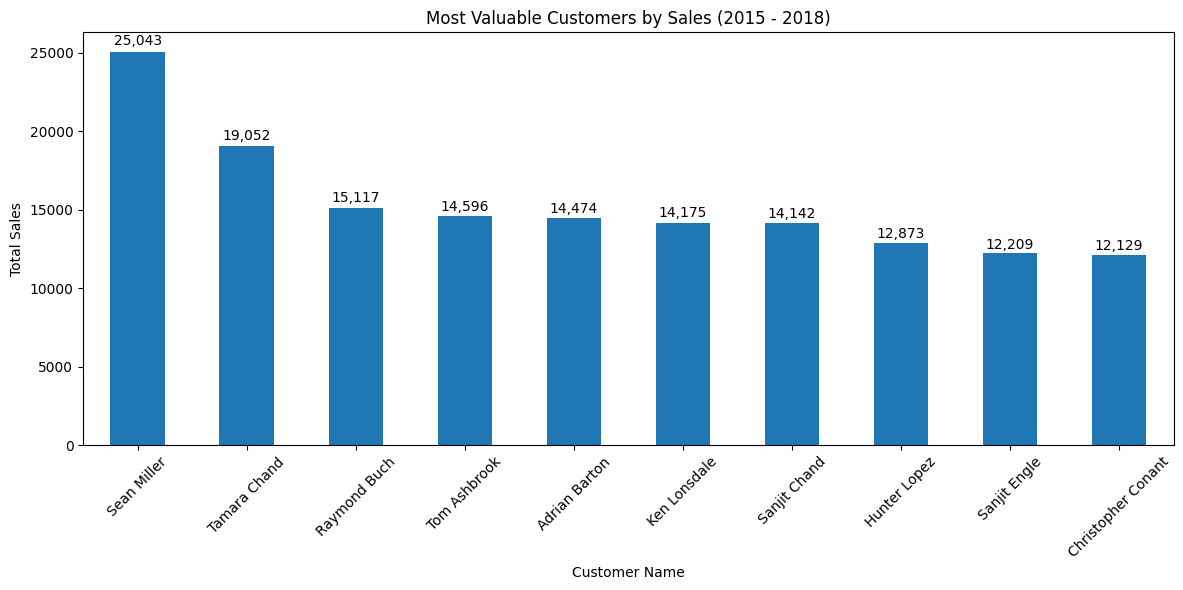

In [98]:
# Top 10 customers by total sales
most_valuable_customers = df.groupby('customer_name')['sales'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
most_valuable_customers.plot(kind='bar')
plt.ylabel("Total Sales")
plt.xlabel("Customer Name")
plt.title("Most Valuable Customers by Sales (2015 - 2018)")

# Add value labels on top of each bar
for x, y in enumerate(most_valuable_customers.values):
    plt.text(x, y + 0.01*y, f'{y:,.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


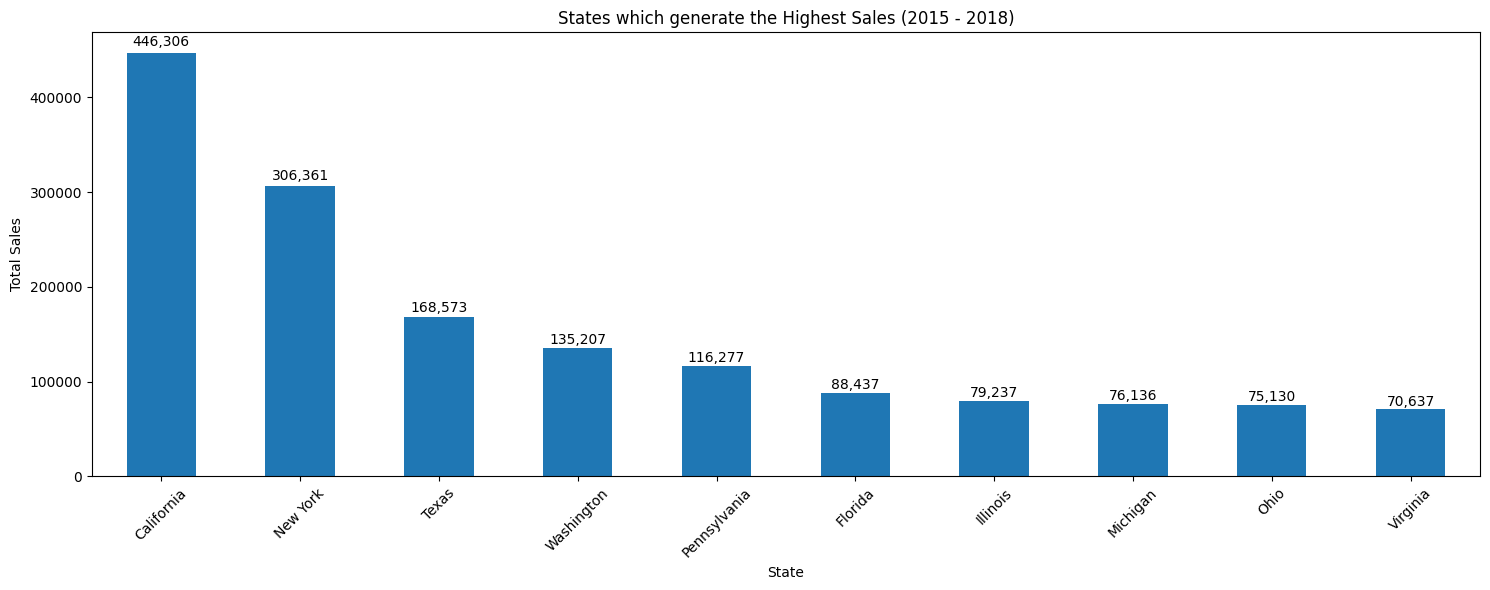

In [ ]:
# Plot top states by total sales
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False)
top_states = state_sales.head(10)

plt.figure(figsize=(15,6))
top_states.plot(kind='bar')
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.title('States which generate the Highest Sales (2015 - 2018)')

# Add value labels on top of bars
for i, v in enumerate(top_states.values):
    plt.text(i, v + 0.01*v, f'{v:,.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
